# Uniform matrix product states in the thermodynamic limit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) uMPS

In [2]:
from tenpy_toycodes.f_umps import UniformMPS, TransferMatrix
from tenpy_toycodes.a_mps import SimpleMPS

### 1.1) Transfer matrix and canonical form of random injective tensor

* Create a random tensor $A \in \mathbb{C}^{D \times d \times D}$ of physical dimension $d = 2$ and bond dimension $D = 4$.

In [3]:
D, d = 4, 2
A = UniformMPS.get_random_tensor(D, d)

* Show that $A$ is injective, i.e. its transfer matrix fulfills $T_A = \vert R \rangle \langle L \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $R,L > 0$.

In [4]:
# Right eigenvector
T = TransferMatrix([A], [A])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)
ERs, _ = np.linalg.eig(R)

# Left eigenvector
T = TransferMatrix([A], [A], transpose=True)
mus, Ls = T.get_leading_eigenpairs(k=2)
L = Ls[0]
L /= np.trace(L)
ELs, _ = np.linalg.eig(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R > 0 with eigenvalues", np.real_if_close(ERs))
print("L > 0 with eigenvalues", np.real_if_close(ELs))

lambda_1 =  (1.000000000000002-3.3306690738754696e-16j)
|lambda_2| =  0.6160984345230737
R > 0 with eigenvalues [0.57721778 0.30300978 0.07951985 0.04025259]
L > 0 with eigenvalues [0.61439961 0.26264189 0.02103773 0.10192076]


* Compute the canonical form of $A$, consisting of left/right orthonormal tensor $A_L / A_R$, center site tensor $A_C$, and center matrix $C$.

In [5]:
AL, AR, AC, C = UniformMPS.to_canonical_form(A)

AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 1.5711079371851106e-15.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 1.2082224766055543e-11.


* Show that $T_{A_L} = \vert R \rangle \langle \mathbb{1} \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $R > 0$.

In [6]:
# Right eigenvector
T = TransferMatrix([AL], [AL])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)
ERs, _ = np.linalg.eig(R)

# Left eigenvector
T = TransferMatrix([AL], [AL], transpose=True)
mus, Ls = T.get_leading_eigenpairs(k=2)
L = Ls[0]
L /= np.trace(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R > 0 with eigenvalues", np.real_if_close(ERs))
print("L = 1:", np.allclose(L, np.eye(4)/4))

lambda_1 =  (1.0000000000000027+1.1102230246251565e-16j)
|lambda_2| =  0.6160984345230714
R > 0 with eigenvalues [0.80936618 0.13963342 0.03967545 0.01132495]
L = 1: True


* Show that $T_{A_R} = \vert \mathbb{1} \rangle \langle L \vert + \mathcal{O}(\vert \lambda_2 \vert)$ with $\vert \lambda_2 \vert < 1$ and $L > 0$.

In [7]:
# Right eigenvector
T = TransferMatrix([AR], [AR])
lambdas, Rs = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
R = Rs[0]
R /= np.trace(R)

# Left eigenvector
T = TransferMatrix([AR], [AR], transpose=True)
lambdas, Ls = T.get_leading_eigenpairs(k=2)
lambda1, lambda2 = lambdas[0], lambdas[1]
L = Ls[0]
L /= np.trace(L)
ELs, _ = np.linalg.eig(L)

assert np.allclose(np.abs(lambdas), np.abs(mus))
print("lambda_1 = ", lambda1)
print("|lambda_2| = ", np.abs(lambda2))
print("R = 1:", np.allclose(R, np.eye(4)/4))
print("L > 0 with eigenvalues", np.real_if_close(ELs))

lambda_1 =  (1.0000000000000033+1.1102230246251565e-16j)
|lambda_2| =  0.6160984345022631
R = 1: True
L > 0 with eigenvalues [0.80936618 0.13963342 0.03967545 0.01132495]


* Directly create a random uMPS (for different tolerances) and test its canonical form.

In [8]:
psi_random = UniformMPS.from_desired_bond_dimension(D=100, d=3, tol=1.e-10)
print(psi_random.test_canonical_form())
psi_random = UniformMPS.from_desired_bond_dimension(D=100, d=3, tol=1.e-5)
print(psi_random.test_canonical_form())

AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 8.781055426747752e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 8.25128128743232e-15.
[2.87610303e-14 2.85505447e-14 0.00000000e+00 9.01957848e-15]
AL, L: Converged up to tol=1e-05. Final error after 5 iterations: 3.1480602430777355e-06.
AR, R: Converged up to tol=1e-05. Final error after 5 iterations: 1.5334010838200997e-07.
[2.80169035e-14 2.88743350e-14 0.00000000e+00 1.53340108e-07]


### 1.2) AKLT state

For the spin-1 matrices $S_x$, $S_y$ and $S_z$, we consider the two-site Hamiltonian matrix <br>
 $$h = S_x \otimes S_x + S_y \otimes S_y + S_z \otimes S_z + \frac{1}{3}(S_x \otimes S_x + S_y \otimes S_y + S_z \otimes S_z)^2 = 2P_{S=2}-2/3.$$
* Implement $h, h^2 \in \mathbb{C}^{3 \times 3 \times 3 \times 3}$.

In [9]:
d = 3

# Spin-1 matrices
Sx = np.array([[0., 1., 0.],[1., 0., 1.],[0., 1., 0.]]) / np.sqrt(2)
Sy = -1.j * np.array([[0., 1., 0.],[-1., 0., 1.],[0., -1., 0.]]) / np.sqrt(2) 
Sz = np.array([[1., 0., 0.],[0., 0., 0.],[0., 0., -1.]])

# Hamiltonian
S_dot_S = np.kron(Sx, Sx) + np.kron(Sy, Sy) + np.kron(Sz, Sz)
h = S_dot_S + (1/3.) * S_dot_S @ S_dot_S
h2 = h @ h
h = np.reshape(h, (d, d, d, d))
h2 = np.reshape(h2, (d, d, d, d))

* Initialize the ground state uMPS $\vert \psi_{\mathrm{AKLT}} \rangle = \vert \psi(A) \rangle$ with $A_L^{+1} = \sqrt{\frac{2}{3}}\sigma^{+}$, $A_L^{0} = \sqrt{\frac{1}{3}}\sigma^{z}$, $A_L^{-1} = -\sqrt{\frac{2}{3}}\sigma^{-}$. 

In [10]:
D = 2

AL = np.zeros((D, d, D), dtype=complex)
AL[:, 0, :] = np.sqrt(2/3.) * np.array([[0., 0.],[1., 0.]])
AL[:, 1, :] = np.sqrt(1/3.) * np.array([[1., 0.],[0., -1.]])
AL[:, 2, :] = -np.sqrt(2/3.) * np.array([[0., 1.],[0., 0.]])

AR, C = UniformMPS.right_orthonormalize(AL)
AC = np.tensordot(AL, C, axes=(2, 0))  # vL p [vR], [vL] vR
psi_AKLT = UniformMPS(AL, AR, AC, C)

AR, R: Converged up to tol=1e-10. Final error after 4 iterations: 2.909395331952169e-11.


Show the following properties of $\vert \psi_{\mathrm{AKLT}} \rangle$: 
* Ground state energy $e = \langle h \rangle = -2/3$, 
* Variance $\langle h^2 \rangle - \langle h \rangle^2 = 0$ (frustration free),
* Entanglement entropy $S = \ln(2) \approx 0.6931471805599453$,
* Correlation length $\xi = -1/\ln(\vert \lambda_2 \vert) = -1/\ln(1/3) = 1/\ln 3 \approx 0.9102392266268371$,
* Connected correlation function $C(n) = \langle S_z^0 S_z^n \rangle - \langle S_z \rangle^2 \rightarrow \vert \lambda_2 \vert^{n-1}$ (plot).

In [11]:
# Ground state energy
print("e = ", psi_AKLT.get_bond_expectation_value(h))
# Variance
print("var_e = ", psi_AKLT.get_bond_expectation_value(h2) - psi_AKLT.get_bond_expectation_value(h)**2)
# Entanglement entropy
print("S = ", psi_AKLT.get_entanglement_entropy())
# Correlation length
print("xi = ", psi_AKLT.get_correlation_length())
# Second largest eigenvalue (to check consistency with formula above)
T = TransferMatrix([psi_AKLT.AL], [psi_AKLT.AL])
lambdas, _ = T.get_leading_eigenpairs(k=2)
lambda2 = lambdas[1]
print("|lambda2| = ", np.abs(lambda2))

e =  -0.6666666666666667
var_e =  -2.220446049250313e-16
S =  0.6931471805599453
xi =  0.9102392266268375
|lambda2| =  0.3333333333333333


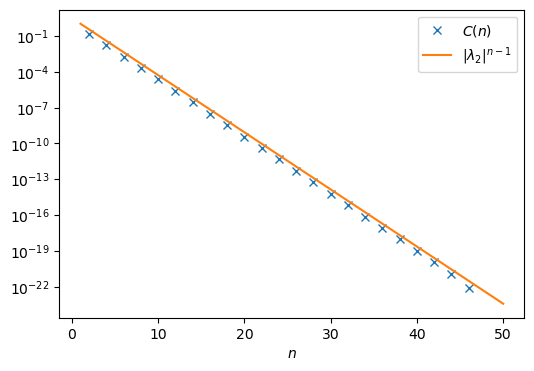

In [12]:
# Correlation functions
N = 50
ns = np.arange(1, N+1)
Cs = psi_AKLT.get_correlation_functions(Sz, Sz, N)
Cs_connected = Cs - psi_AKLT.get_site_expectation_value(Sz)**2
Cs_theo = []
for n in ns:
    Cs_theo.append(np.abs(lambda2)**(n-1))

plt.figure(figsize=(6, 4))
plt.xlabel(r"$n$")
plt.semilogy(ns, Cs_connected, "x", label=r"$C(n)$")
plt.semilogy(ns, Cs_theo, "-", label=r"$\vert \lambda_2 \vert^{n-1}$")
plt.legend(loc="best")
plt.show()

### 1.3) Conversions between uniform MPS and infinite MPS

* Convert the uMPS $\vert \psi_{\mathrm{AKLT}} \rangle$ to an iMPS and recheck the values of $e$, $S$, $\xi$.

In [13]:
psi_AKLT_infinite = psi_AKLT.to_infinite_MPS(L=1)

# Ground state energy
print("e = ", psi_AKLT_infinite.bond_expectation_value([h]))
# Variance
print("var_e = ", psi_AKLT_infinite.bond_expectation_value([h2]) \
      - psi_AKLT_infinite.bond_expectation_value([h])**2)
# Entanglement entropy
print("S = ", psi_AKLT_infinite.entanglement_entropy())
# Correlation length
print("xi = ", psi_AKLT_infinite.correlation_length())

e =  [-0.66666667]
var_e =  [-5.55111512e-16]
S =  [0.69314718]
xi =  0.9102392266268376


* Denote by $B \in \mathbb{C}^{2 \times 3 \times 2}$ the right canonical tensor of $\vert \psi_{\mathrm{AKLT}} \rangle$ and by $U \in \mathbb{C}^{2 \times 2}$ a random unitary. Show that the iMPS $\vert\psi(B_1, B_2)\rangle$ with $B_1 = BU$ and $B_2 = U^*B$ is translation invariant and can be converted to a uMPS. Check that this is still the AKLT state.

In [14]:
B = psi_AKLT_infinite.Bs[0]
C = psi_AKLT_infinite.Ss[0]
from scipy.stats import unitary_group
U = unitary_group.rvs(2)
B1 = np.tensordot(B, U, axes=(2, 0))
B2 = np.tensordot(np.conj(U).T, B, axes=(1, 0))

psi_infinite = SimpleMPS([B1, B2], [C, C], bc="infinite")
psi_uniform = UniformMPS.from_infinite_MPS(psi_infinite)

# Ground state energy
print("e = ", psi_uniform.get_bond_expectation_value(h))
# Variance
print("var_e = ", psi_uniform.get_bond_expectation_value(h2) - psi_uniform.get_bond_expectation_value(h)**2)
# Entanglement entropy
print("S = ", psi_uniform.get_entanglement_entropy())
# Correlation length
print("xi = ", psi_uniform.get_correlation_length())

Infinite MPS is translation invariant -> Conversion to uniform MPS.
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 4.0874916160039974e-17.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 3.5965846887725563e-16.
e =  -0.666666666666667
var_e =  -2.7755575615628914e-16
S =  0.6931471805599452
xi =  0.9102392266268376


* For random right canonical tensors $B_1 \in \mathbb{C}^{D \times d \times D}$ and $B_2 \in \mathbb{C}^{D \times d \times D}$, show that the iMPS $\vert\psi(B_1, B_2)\rangle$ is in general not translation invariant and cannot be converted to a uMPS.

In [15]:
tensor1 = UniformMPS.get_random_tensor(D=100, d=3)
tensor2 = UniformMPS.get_random_tensor(D=100, d=3)
_, B1, _, S1 = UniformMPS.to_canonical_form(tensor1)
_, B2, _, S2 = UniformMPS.to_canonical_form(tensor2)
S1, S2 = np.diag(S1), np.diag(S1)

psi_infinite = SimpleMPS([B1, B2], [S1, S2], bc="infinite")
psi_uniform = UniformMPS.from_infinite_MPS(psi_infinite)

AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 4.725358983908141e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 2.0290081266841525e-14.
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 4.533022634730654e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 1.2867990382937158e-14.


ValueError: Infinite MPS is not translation invariant.

## 2) VUMPS: Variational ground state search

In [16]:
from tenpy_toycodes.b_model import TFIModel
from tenpy_toycodes.tfi_exact import infinite_gs_energy

from tenpy_toycodes.f_umps import UniformMPS
from tenpy_toycodes.g_vumps import vumps_algorithm

* For the transverse field Ising model in the thermodynamic limit, find the ground state using the VUMPS algorithm. Investigate the convergence of the ground state energy density $e_0$ with the bond dimension $D$. Consider both the paramagnetic and ferromagnetic quantum phase.

In [17]:
# paramagnetic phase
g = 1.5

e0_exact = infinite_gs_energy(J=1., g=g)
print(f"e0_exact = {e0_exact}.")

h = TFIModel(L=1, J=1., g=g, bc='infinite').H_bonds[0]
Ds = [2, 4, 6, 8, 10, 20, 30, 40, 50]
for D in Ds:
    print(f"D = {D}:")
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    e0, psi0, var0 = vumps_algorithm(h, guess_psi0, tol=1.e-10)
    print(f"Error |e0 - e0_exact| = {np.abs(e0 - e0_exact)}.")

e0_exact = -1.6719262215361952.
D = 2:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 4.633249469092208e-14.
AR, R: Converged up to tol=1e-10. Final error after 4 iterations: 8.407646859504889e-14.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 20 iterations: 3.235188049532595e-11.
Ground state energy density: -1.671736623893609. 
Ground state variance density: (0.0009884261166277844+5.697007802895037e-17j).
Error |e0 - e0_exact| = 0.00018959764258608125.
D = 4:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 1.0567540718147041e-11.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 1.509763507803523e-12.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 14 iterations: 4.2959637840299707e-11.
Ground state energy density: -1.6719259668748543. 
Ground state variance density: (1.326284236873032e-06-9.389190813724468e-17j).
Error |e0 - e0_exact| = 2.5466134090379455e-07.
D = 6:
AL, L: C

In [18]:
# ferromagnetic phase 
g = 0.5

e0_exact = infinite_gs_energy(J=1., g=g)
print(f"e0_exact = {e0_exact}.")

h = TFIModel(L=1, J=1., g=g, bc='infinite').H_bonds[0]
Ds = [2, 4, 6, 8, 10, 20, 30, 40, 50]
for D in Ds:
    print(f"D = {D}:")
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    e0, psi0, var0 = vumps_algorithm(h, guess_psi0, tol=1.e-10)
    print(f"Error |e0 - e0_exact| = {np.abs(e0 - e0_exact)}.")

e0_exact = -1.0635444099733717.
D = 2:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 3.6575195141722327e-13.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 1.6782945342419286e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 8 iterations: 5.604595358426558e-11.
Ground state energy density: -1.0635440740663125. 
Ground state variance density: (1.2520078219564962e-06-1.4973424925087894e-18j).
Error |e0 - e0_exact| = 3.359070592789948e-07.
D = 4:
AL, L: Converged up to tol=1e-10. Final error after 5 iterations: 7.879850666576793e-14.
AR, R: Converged up to tol=1e-10. Final error after 5 iterations: 2.012896011259176e-16.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 15 iterations: 8.366396379864333e-11.
Ground state energy density: -1.0635444098648614. 
Ground state variance density: (4.0439849342474576e-10-4.708994966965557e-17j).
Error |e0 - e0_exact| = 1.0851031184699877e-10.
D = 6:
AL, L:

* For a bond dimension $D = 30$, plot the magnetization $m = \vert \langle \sigma^z \rangle \vert$ against the transverse field $g$ to locate the quantum phase transition.

In [19]:
D = 30
gs = [1.e-5, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.994, 0.998,\
       1.002, 1.006, 1.01, 1.02, 1.03, 1.04, 1.05, 1.1, 1.2, 1.4, 1.6, 1.8, 2.0]
szs = []
for g in gs:
    print(f"g = {g}:")
    tfi_model = TFIModel(L=1, J=1., g=g, bc='infinite')
    h = tfi_model.H_bonds[0]
    guess_psi0 = UniformMPS.from_desired_bond_dimension(D)
    _, psi0, _ = vumps_algorithm(h, guess_psi0, tol=1.e-10)
    sz = psi0.get_site_expectation_value(tfi_model.sigmaz)
    print(f"Magnetization density in z-direction:{sz}.")
    szs.append(sz)

g = 1e-05:
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 1.0841318558752074e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 4.464060242955317e-15.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 3 iterations: 1.0558412697719659e-12.
Ground state energy density: -1.000000000024999. 
Ground state variance density: (-2.4640661875812474e-28+6.956158032572885e-29j).
Magnetization density in z-direction:-0.9999999999875013.
g = 0.2:
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 3.5724495331655725e-11.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 7.398077452640131e-14.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 3 iterations: 9.02909963479197e-12.
Ground state energy density: -1.0100252539845829. 
Ground state variance density: (7.3283257717368655e-16-5.836057006582129e-19j).
Magnetization density in z-direction:-0.9949102475942042.
g = 0.4:
AL, L: Conv

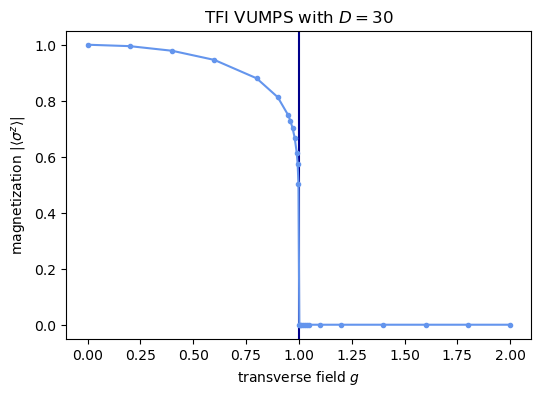

In [20]:
plt.figure(figsize=(6, 4))
plt.title(f"TFI VUMPS with $D={D}$")
plt.axvline(x=1.0, color="darkblue")
plt.plot(gs, np.abs(szs), ".-", color="cornflowerblue")
plt.xlabel(r"transverse field $g$")
plt.ylabel(r"magnetization $\vert \langle \sigma^z \rangle \vert$")
plt.show()

Magnetization $m =  \vert \langle \sigma^z \rangle \vert$ as order parameter: <br>
$m >0$ for $g<1$ (ferromagnetic phase), $m = 0$ for $g>1$ (paramagnetic phase), quantum phase transition at $g=1$.

## 3) uTDVP: Global quench dynamics

In [21]:
from tenpy_toycodes.b_model import TFIModel
from tenpy_toycodes.c_tebd import example_TEBD_gs_tf_ising_infinite, calc_U_bonds, update_bond

from tenpy_toycodes.f_umps import UniformMPS
from tenpy_toycodes.g_vumps import vumps_algorithm
from tenpy_toycodes.h_utdvp import utdvp_algorithm

For benchmark we want to use iTEBD. The `run_TEBD` function in `c_tebd.py` relies on a first order Trotter decomposition. We want to improve this to second order:

$$ H = H_{\mathrm{odd}} + H_{\mathrm{even}} \Rightarrow U(dt) = e^{-i dt H_{\mathrm{odd}}/2} e^{-i dt H_{\mathrm{even}}} e^{-i dt H_{\mathrm{odd}}/2} + \mathcal{O}(dt^3).$$

* Implement this improved scheme in a function `run_TEBD_second_order`. 

* Then write a function `itebd_global_quench` performing a global quench dynamics for the TFI model. Compute the ground state for a value $g_1$ of the transverse field and subsequently evolve it according to a different value $g_2$. Converge the method in bond dimension $D$ and time step $dt$.

In [22]:
def run_TEBD_second_order(psi, U_bonds, U_bonds_half_dt, N_steps, chi_max, eps):
    """Evolve MPS psi for N_steps time steps with second order TEBD.

    H = H_odd + H_even
    U = exp(-i * dt * H) \\approx exp(-i * dt/2 * H_odd) exp(-i * dt * H_even) exp(-i* dt/2 *H_odd)
    """
    Nbonds = psi.L - 1 if psi.bc == 'finite' else psi.L
    assert len(U_bonds) == len(U_bonds_half_dt) == Nbonds
    for i_bond in range(0, Nbonds, 2):  # odd (half)
        update_bond(psi, i_bond, U_bonds_half_dt[i_bond], chi_max, eps)
    for i_bond in range(1, Nbonds, 2):  # even
        update_bond(psi, i_bond, U_bonds[i_bond], chi_max, eps)
    for n in range(N_steps - 1):  # N_steps - 1 times odd, even 
        for k in [0, 1]:
            for i_bond in range(k, Nbonds, 2):
                update_bond(psi, i_bond, U_bonds[i_bond], chi_max,eps)
    for i_bond in range(0, Nbonds, 2):  # odd (half)
        update_bond(psi, i_bond, U_bonds_half_dt[i_bond], chi_max, eps) 

def itebd_global_quench(g1, g2, chi_max, dt, T):
    """Calculate the tfi ground state for transverse field g1 and evolve it according to different g2 
    up to time T in steps of dt with second order iTEBD."""
    _, psi1, _ = example_TEBD_gs_tf_ising_infinite(g1, chi_max)
    model2 = TFIModel(L=2, J=1., g=g2, bc="infinite")
    H_bonds = model2.H_bonds
    U_bonds = calc_U_bonds(H_bonds, 1.j * dt)
    U_bonds_half_dt = calc_U_bonds(H_bonds, 1.j * dt/2)
    ts = []
    Ss = []
    t = 0.
    ts.append(t)
    Ss.append(psi1.entanglement_entropy()[1])
    psi = psi1
    for i in range(int(T/dt)):
        run_TEBD_second_order(psi, U_bonds, U_bonds_half_dt, N_steps=1, chi_max=chi_max, eps=1.e-10)
        t += dt
        ts.append(t)
        Ss.append(psi.entanglement_entropy()[0])     
    return ts, Ss

In [23]:
g1 = 3.
g2 = 1.5
T = 5.

infinite TEBD, imaginary time evolution, transverse field Ising
g=3.00
dt = 0.10000: E (per site) = -3.0722915530137
dt = 0.01000: E (per site) = -3.0827483842174
dt = 0.00100: E (per site) = -3.0838108901537
dt = 0.00010: E (per site) = -3.0839168389419
dt = 0.00001: E (per site) = -3.0839274447472
final bond dimensions:  [10, 10]
<sigma_x> = 0.97161
<sigma_z> = -0.00000
correlation length: 0.886591626230449
Analytic result: E (per site) = -3.0839288503801
relative error:  4.5579290330811456e-07
infinite TEBD, imaginary time evolution, transverse field Ising
g=3.00
dt = 0.10000: E (per site) = -3.0722915530137
dt = 0.01000: E (per site) = -3.0827483842174
dt = 0.00100: E (per site) = -3.0838108901537
dt = 0.00010: E (per site) = -3.0839168389419
dt = 0.00001: E (per site) = -3.0839274447472
final bond dimensions:  [11, 11]
<sigma_x> = 0.97161
<sigma_z> = -0.00000
correlation length: 0.8939157106447442
Analytic result: E (per site) = -3.0839288503801
relative error:  4.5579290330811456

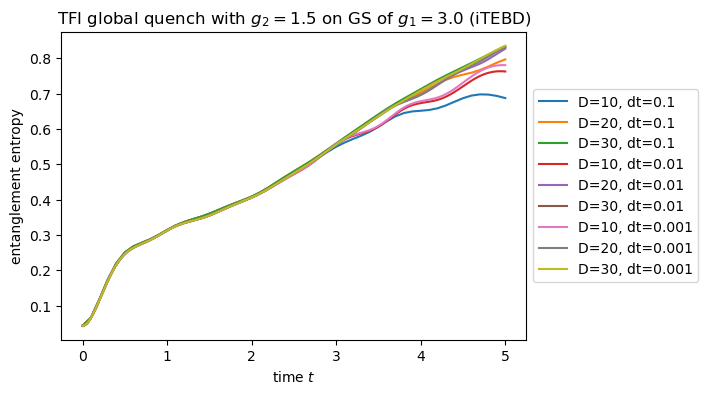

In [24]:
plt.figure(figsize=(6, 4))
plt.title(f"TFI global quench with $g_2={g2}$ on GS of $g_1={g1}$ (iTEBD)")
plt.xlabel('time $t$')
plt.ylabel('entanglement entropy')
for dt in [0.1, 0.01, 0.001]:
    for D in [10, 20, 30]:
        ts_itebd, Ss_itebd = itebd_global_quench(g1, g2, D, dt, T)
        plt.plot(ts_itebd, Ss_itebd, label=f"D={D}, dt={dt}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

* Analogous to `itebd_global_quench`, write a function `utdvp_global_quench` and make sure they give the same dynamics.

In [25]:
def utdvp_global_quench(g1, g2, D, dt, T):
    """Calculate the tfi ground state for transverse field g1 and evolve it according to different g2 
    up to time T in steps of dt with uTDVP."""
    h1 = TFIModel(L=1, J=1., g=g1, bc="infinite").H_bonds[0]
    h2 = TFIModel(L=1, J=1., g=g2, bc="infinite").H_bonds[0]
    guess_psi1 = UniformMPS.from_desired_bond_dimension(D)
    _, psi1, _ = vumps_algorithm(h1, guess_psi1, tol=1.e-10)
    ts, Ss = utdvp_algorithm(psi1, h2, dt, T)
    return ts, Ss

In [26]:
g1 = 3.
g2 = 1.5
D = 30
T = 5.
dt = 0.01

In [27]:
ts_itebd, Ss_itebd = itebd_global_quench(g1, g2, D, dt, T)
ts_utdvp, Ss_utdvp = utdvp_global_quench(g1, g2, D, dt, T)

infinite TEBD, imaginary time evolution, transverse field Ising
g=3.00
dt = 0.10000: E (per site) = -3.0722915530137
dt = 0.01000: E (per site) = -3.0827483842174
dt = 0.00100: E (per site) = -3.0838108901537
dt = 0.00010: E (per site) = -3.0839168389419
dt = 0.00001: E (per site) = -3.0839274447472
final bond dimensions:  [11, 11]
<sigma_x> = 0.97161
<sigma_z> = -0.00000
correlation length: 0.8939157106447625
Analytic result: E (per site) = -3.0839288503801
relative error:  4.5579290330811456e-07
AL, L: Converged up to tol=1e-10. Final error after 6 iterations: 5.117080131926979e-12.
AR, R: Converged up to tol=1e-10. Final error after 6 iterations: 2.0059998935156386e-15.
Ground state converged up to tol=1e-10 in gradient norm. Final error after 4 iterations: 9.203177170517007e-14.
Ground state energy density: -3.0839288503800635. 
Ground state variance density: (2.7755575615628914e-16-2.8471149049469346e-16j).


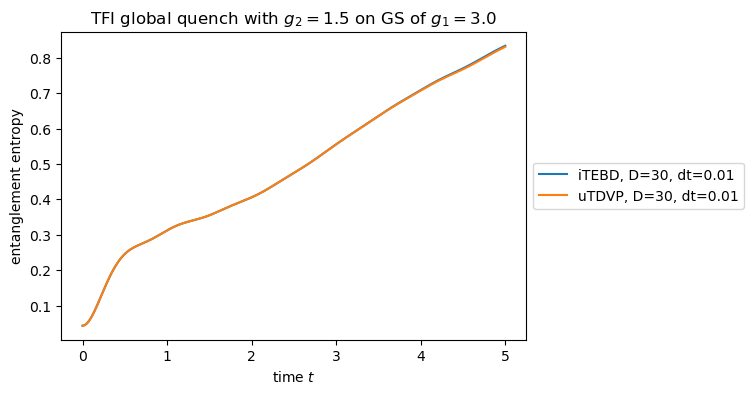

In [28]:
plt.figure(figsize=(6, 4))
plt.title(f"TFI global quench with $g_2={g2}$ on GS of $g_1={g1}$")
plt.xlabel('time $t$')
plt.ylabel('entanglement entropy')
plt.plot(ts_itebd, Ss_itebd, label=f"iTEBD, D={D}, dt={dt}")
plt.plot(ts_utdvp, Ss_utdvp, label=f"uTDVP, D={D}, dt={dt}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()